In [2]:
import numpy as np
import h5py

data_name = '../skill_discovery_data/LIBERO-Object/dinov2_libero_object_image_only_10/skill_data/saved_feature_data.hdf5'
tsne_data_name = data_name.replace('.hdf5', '_tsne.hdf5')
with h5py.File(data_name, "r") as f:
    print(f.keys())
    cluster_labels = f['cluster_labels'][...]
    demo_indices = f['demo_indices'][...]
    embeddings = f['embeddings'][...]
    task_ids = f['task_ids'][...]


from sklearn.manifold import TSNE
# Calculate t-SNE for the combined data
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(embeddings)
tsne_results = np.round(tsne_results, 3)
with h5py.File(tsne_data_name, "w") as f:
    data = f.create_dataset('tsne_results', data=tsne_results)

<KeysViewHDF5 ['cluster_labels', 'demo_indices', 'embeddings', 'seg_end', 'seg_start', 'task_ids']>


In [32]:
import os
from libero.libero import benchmark, get_libero_path, set_libero_default_path
datasets_default_path = get_libero_path("datasets")
benchmark_dict = benchmark.get_benchmark_dict()
benchmark_instance = benchmark_dict["libero_goal"]()
num_tasks = benchmark_instance.get_num_tasks()
demo_files = [os.path.join(datasets_default_path, benchmark_instance.get_task_demonstration(i)) for i in range(num_tasks)]
print(demo_files)
for deom_file in demo_files:
    print(os.path.exists(deom_file))



[info] using task orders [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['/Users/yifengz/workspace/libero_ws/LIBERO-yifeng/libero/libero/../datasets/libero_goal/open_the_middle_drawer_of_the_cabinet_demo.hdf5', '/Users/yifengz/workspace/libero_ws/LIBERO-yifeng/libero/libero/../datasets/libero_goal/put_the_bowl_on_the_stove_demo.hdf5', '/Users/yifengz/workspace/libero_ws/LIBERO-yifeng/libero/libero/../datasets/libero_goal/put_the_wine_bottle_on_top_of_the_cabinet_demo.hdf5', '/Users/yifengz/workspace/libero_ws/LIBERO-yifeng/libero/libero/../datasets/libero_goal/open_the_top_drawer_and_put_the_bowl_inside_demo.hdf5', '/Users/yifengz/workspace/libero_ws/LIBERO-yifeng/libero/libero/../datasets/libero_goal/put_the_bowl_on_top_of_the_cabinet_demo.hdf5', '/Users/yifengz/workspace/libero_ws/LIBERO-yifeng/libero/libero/../datasets/libero_goal/push_the_plate_to_the_front_of_the_stove_demo.hdf5', '/Users/yifengz/workspace/libero_ws/LIBERO-yifeng/libero/libero/../datasets/libero_goal/put_the_cream_cheese_in_the_b

[0 1 2]


(-50.0, 50.0)

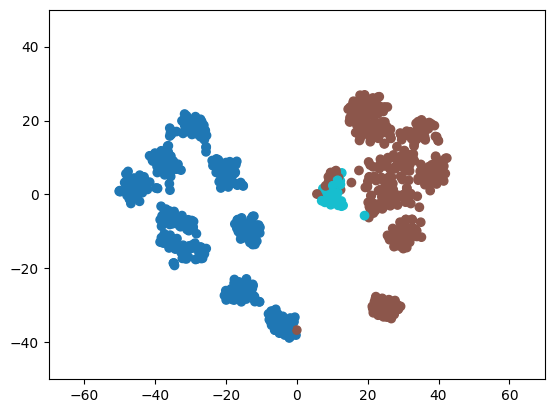

In [24]:
import matplotlib.pyplot as plt

lifelong_step_1 = np.where(task_ids < 6)
lifelong_step_2 = np.where(task_ids <= 8)

lifelong_step = lifelong_step_2
plt.scatter(tsne_results[lifelong_step, 0], tsne_results[lifelong_step, 1], c=cluster_labels[lifelong_step], cmap='tab10')
print(np.unique(cluster_labels[lifelong_step]))
plt.xlim([-70, 70])
plt.ylim([-50, 50])

In [ ]:
def visualize_tsne(tsne_results, labels, title, colors_list, name, cfg, dataset_name, new_dataset_idx, xlim=None, ylim=None):
    plt.figure(figsize=(10, 8))
    
    unique_labels = np.unique(labels)
    for label in unique_labels:
        if label < len(colors_list):  # Ensure the label has a corresponding color
            indices = np.where(labels == label)
            plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], color=colors_list[label], alpha=0.8, label=f'Cluster {label}')

    handles, legend_labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, legend_labels)  # Show custom legend
    plt.title(title)
    plt.grid(True)
    # Set the xlim and ylim if provided
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    # plt.show()
    save_exp_name = f"{cfg.exp_name}_{new_dataset_idx+1}"
    os.makedirs(f"results/{save_exp_name}/skill_data_vis/{dataset_name}", exist_ok=True)
    plt.savefig(f"results/{save_exp_name}/skill_data_vis/{dataset_name}/debug_{name}.png")


from sklearn.manifold import TSNE
# Calculate t-SNE for the combined data
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X_features)

# Visualization using both original and new data
visualize_tsne(tsne_results, X_labels, "T-SNE Visualization of Processed Data", colors_list=colors, name="processed", cfg=cfg, dataset_name=dataset_name, new_dataset_idx=new_dataset_idx)

# Retrieve the xlim and ylim for the processed data
xlim = plt.xlim()
ylim = plt.ylim()
# Visualization using original data only
visualize_tsne(tsne_results[:len(X_original)], X_labels[:len(X_original)], "T-SNE Visualization of Original Data", colors_list=colors, name="original", cfg=cfg, dataset_name=dataset_name, new_dataset_idx=new_dataset_idx, xlim=xlim, ylim=ylim)